# <span style="color:blue"> Numerical Simulation Laboratory (NSL) </span>
    
##  <span style="color:blue"> Edoardo Baraldi - Notebook 11</span>  

### Exercise 11.1

In order to make practice with NN, explore how does the previous linear regression depend on the number of epochs, $N_{\mathrm{epochs}}$, the number of data points $N_{\mathrm{train}}$ and on the noise $\sigma$. Try to improve the previous result operating on these parameters.

### Exercise 11.2

Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

Find good (& reasonable) choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function
  
Check your NN model by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model? How about points outside the original training data set? 
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.

### Exercise 11.3
  
Try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

## Exercise 11.1

### Linear fit

We start by considering the very simple case:
$$
f(x)=2x+1
$$

In [1]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import math
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects


plt.rcParams.update({'font.size': 16})
plt.rcParams["figure.figsize"]= (10,8)

2023-06-06 13:19:16.246013: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-06 13:19:16.349121: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-06 13:19:16.349772: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-06 13:19:17.259733: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### Model 1 $\sigma=0.3$  $N_{epochs}=15$  $N_{train}=900$ 

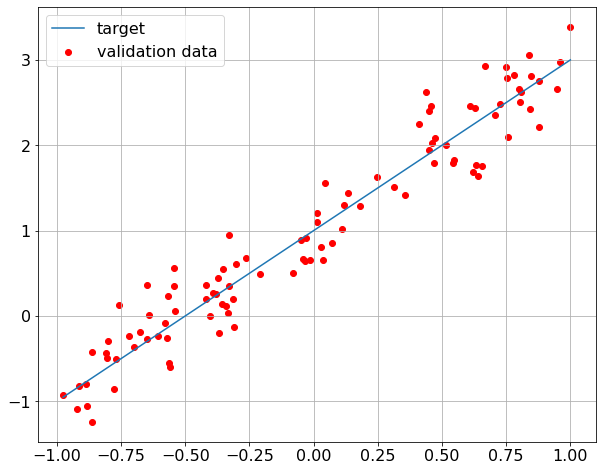

In [3]:
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 900)
x_valid = np.random.uniform(-1, 1, 100)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.3 # noise standard deviation
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

# plot validation and target dataset
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
# compose the model and complie it
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# fit the model using training dataset
# over 15 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=15,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))
model.get_weights()

Epoch 1/15
29/29 [==============================] - 0s 5ms/step - loss: 1.6520 - mse: 1.6520 - val_loss: 1.1743 - val_mse: 1.1743
Epoch 2/15
29/29 [==============================] - 0s 2ms/step - loss: 0.9158 - mse: 0.9158 - val_loss: 0.7231 - val_mse: 0.7231
Epoch 3/15
29/29 [==============================] - 0s 2ms/step - loss: 0.5831 - mse: 0.5831 - val_loss: 0.4832 - val_mse: 0.4832
Epoch 4/15
29/29 [==============================] - 0s 2ms/step - loss: 0.3991 - mse: 0.3991 - val_loss: 0.3467 - val_mse: 0.3467
Epoch 5/15
29/29 [==============================] - 0s 2ms/step - loss: 0.2900 - mse: 0.2900 - val_loss: 0.2619 - val_mse: 0.2619
Epoch 6/15
29/29 [==============================] - 0s 2ms/step - loss: 0.2210 - mse: 0.2210 - val_loss: 0.2069 - val_mse: 0.2069
Epoch 7/15
29/29 [==============================] - 0s 2ms/step - loss: 0.1754 - mse: 0.1754 - val_loss: 0.1706 - val_mse: 0.1706
Epoch 8/15
29/29 [==============================] - 0s 2ms/step - loss: 0.1452 - mse: 0.14

[array([[1.884812]], dtype=float32), array([1.0045373], dtype=float32)]

In [5]:
# evaluate model 
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4/4 [==============================] - 0s 1ms/step - loss: 0.1005 - mse: 0.1005

Test loss: 0.10047201067209244
Test accuracy: 0.10047201067209244


4/4 [==============================] - 0s 2ms/step


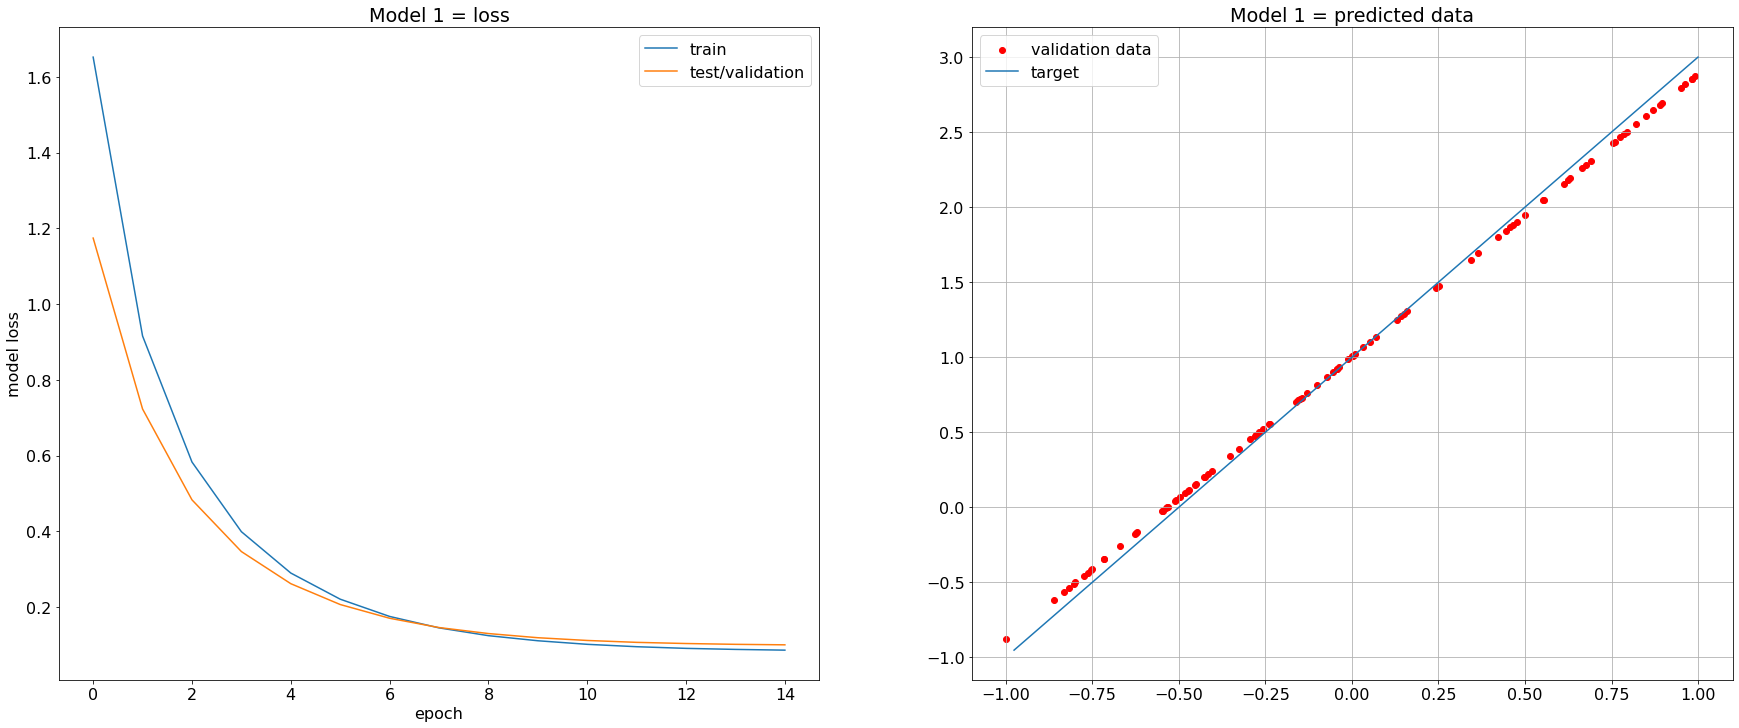

In [6]:
fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(30 , 12))

ax0.plot(history.history['loss'])
ax0.plot(history.history['val_loss'])
ax0.set_ylabel('model loss')
ax0.set_xlabel('epoch')
ax0.legend(['train', 'test/validation'], loc='best')
ax0.set_title('Model 1 = loss')

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
ax1.scatter(x_predicted, y_predicted,color='r', label="validation data")
ax1.plot(x_valid, y_target, label='target')
ax1.legend()
ax1.set_title('Model 1 = predicted data')
ax1.grid(True)
plt.show()

### Model 2 $\sigma=0.5$  $N_{epochs}=50$  $N_{train}=2000$ 

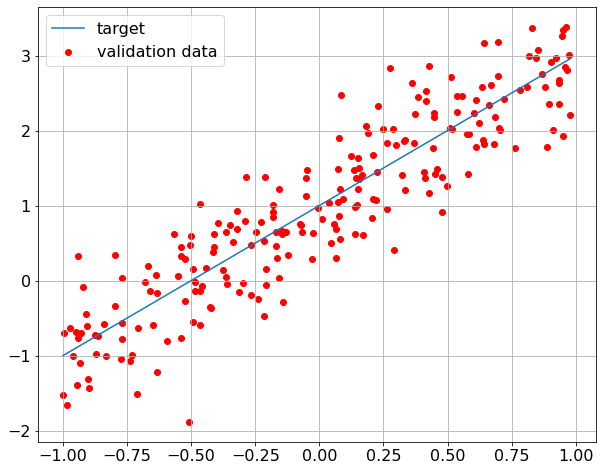

In [7]:
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 2000)
x_valid = np.random.uniform(-1, 1, 222)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.5 # noise standard deviation
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)
# plot validation and target dataset
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
# compose the model and complie it
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# fit the model using training dataset
# over 50 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))
model.get_weights()

Epoch 1/50
63/63 [==============================] - 0s 3ms/step - loss: 2.4828 - mse: 2.4828 - val_loss: 1.3526 - val_mse: 1.3526
Epoch 2/50
63/63 [==============================] - 0s 1ms/step - loss: 1.0441 - mse: 1.0441 - val_loss: 0.6779 - val_mse: 0.6779
Epoch 3/50
63/63 [==============================] - 0s 2ms/step - loss: 0.5618 - mse: 0.5618 - val_loss: 0.4243 - val_mse: 0.4243
Epoch 4/50
63/63 [==============================] - 0s 2ms/step - loss: 0.3726 - mse: 0.3726 - val_loss: 0.3242 - val_mse: 0.3242
Epoch 5/50
63/63 [==============================] - 0s 2ms/step - loss: 0.2955 - mse: 0.2955 - val_loss: 0.2832 - val_mse: 0.2832
Epoch 6/50
63/63 [==============================] - 0s 2ms/step - loss: 0.2631 - mse: 0.2631 - val_loss: 0.2663 - val_mse: 0.2663
Epoch 7/50
63/63 [==============================] - 0s 2ms/step - loss: 0.2497 - mse: 0.2497 - val_loss: 0.2598 - val_mse: 0.2598
Epoch 8/50
63/63 [==============================] - 0s 2ms/step - loss: 0.2440 - mse: 0.24

[array([[2.0046887]], dtype=float32), array([0.98625684], dtype=float32)]

In [9]:
# evaluate model 
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

7/7 [==============================] - 0s 2ms/step - loss: 0.2565 - mse: 0.2565

Test loss: 0.2564798593521118
Test accuracy: 0.2564798593521118


4/4 [==============================] - 0s 1ms/step


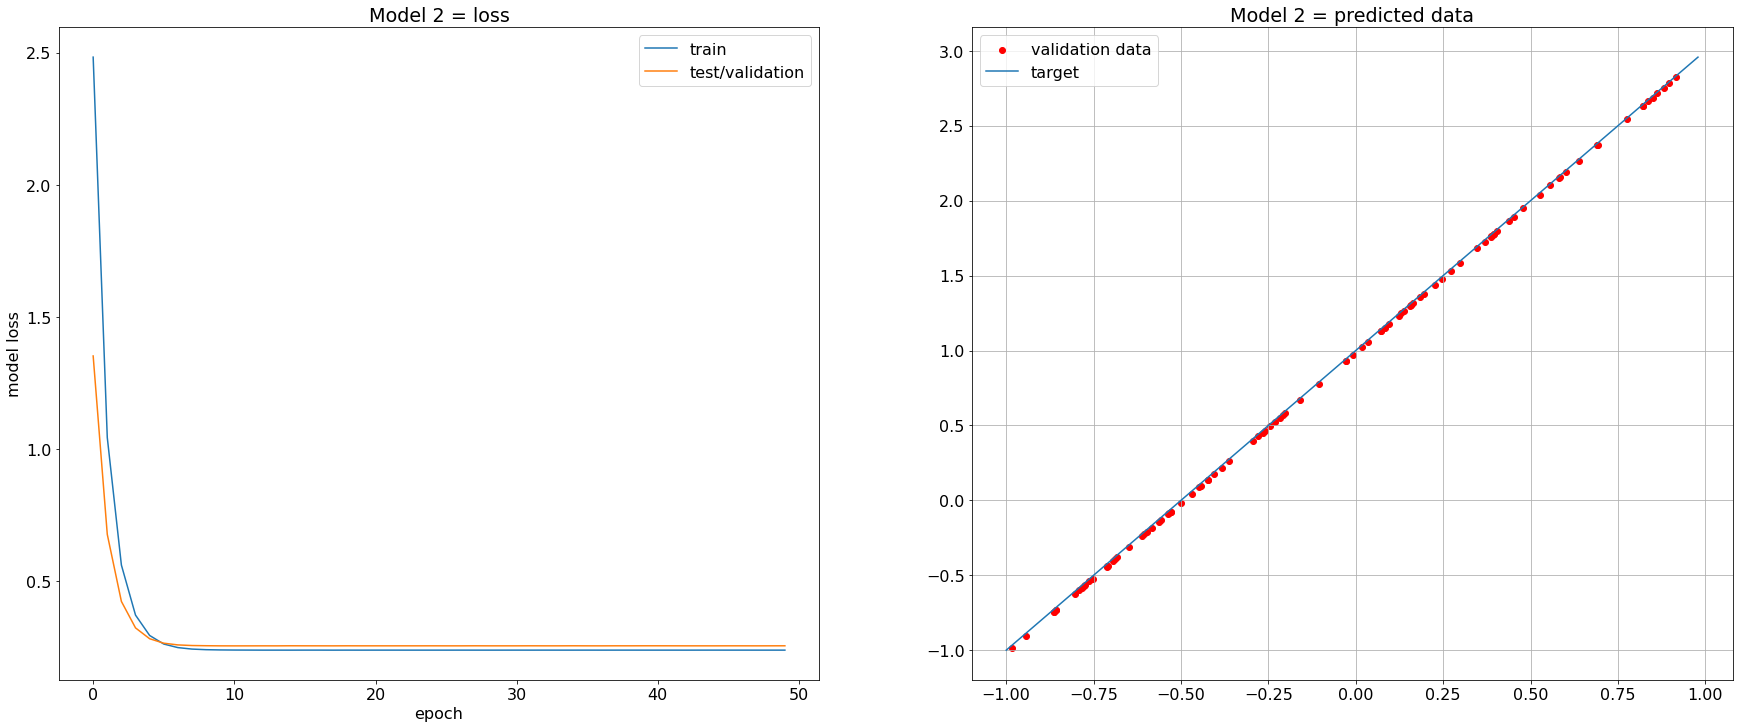

In [10]:
fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(30 , 12))

ax0.plot(history.history['loss'])
ax0.plot(history.history['val_loss'])
ax0.set_ylabel('model loss')
ax0.set_xlabel('epoch')
ax0.legend(['train', 'test/validation'], loc='best')
ax0.set_title('Model 2 = loss')

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
ax1.scatter(x_predicted, y_predicted,color='r', label="validation data")
ax1.plot(x_valid, y_target, label='target')
ax1.legend()
ax1.set_title('Model 2 = predicted data')
ax1.grid(True)
plt.show()

### Model 3 $\sigma=0.2$  $N_{epochs}=10$  $N_{train}=300$ 

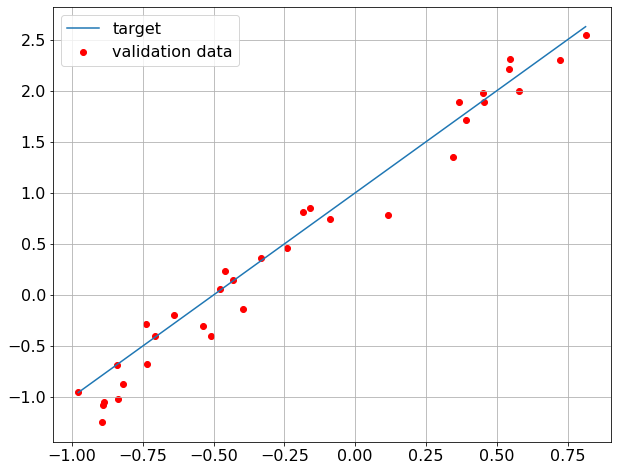

In [11]:
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 300)
x_valid = np.random.uniform(-1, 1, 33)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.2 # noise standard deviation
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

# plot validation and target dataset
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
# compose the model and complie it
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=10,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))
model.get_weights()

Epoch 1/10
10/10 [==============================] - 0s 12ms/step - loss: 2.5575 - mse: 2.5575 - val_loss: 1.6312 - val_mse: 1.6312
Epoch 2/10
10/10 [==============================] - 0s 4ms/step - loss: 2.0610 - mse: 2.0610 - val_loss: 1.3937 - val_mse: 1.3937
Epoch 3/10
10/10 [==============================] - 0s 4ms/step - loss: 1.6769 - mse: 1.6769 - val_loss: 1.2166 - val_mse: 1.2166
Epoch 4/10
10/10 [==============================] - 0s 4ms/step - loss: 1.3959 - mse: 1.3959 - val_loss: 1.0689 - val_mse: 1.0689
Epoch 5/10
10/10 [==============================] - 0s 3ms/step - loss: 1.1699 - mse: 1.1699 - val_loss: 0.9536 - val_mse: 0.9536
Epoch 6/10
10/10 [==============================] - 0s 4ms/step - loss: 0.9953 - mse: 0.9953 - val_loss: 0.8521 - val_mse: 0.8521
Epoch 7/10
10/10 [==============================] - 0s 4ms/step - loss: 0.8519 - mse: 0.8519 - val_loss: 0.7647 - val_mse: 0.7647
Epoch 8/10
10/10 [==============================] - 0s 4ms/step - loss: 0.7360 - mse: 0.7

[array([[0.83720475]], dtype=float32), array([0.8563607], dtype=float32)]

In [13]:
# evaluate model 
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 3ms/step - loss: 0.5591 - mse: 0.5591

Test loss: 0.5590822696685791
Test accuracy: 0.5590822696685791


4/4 [==============================] - 0s 1ms/step


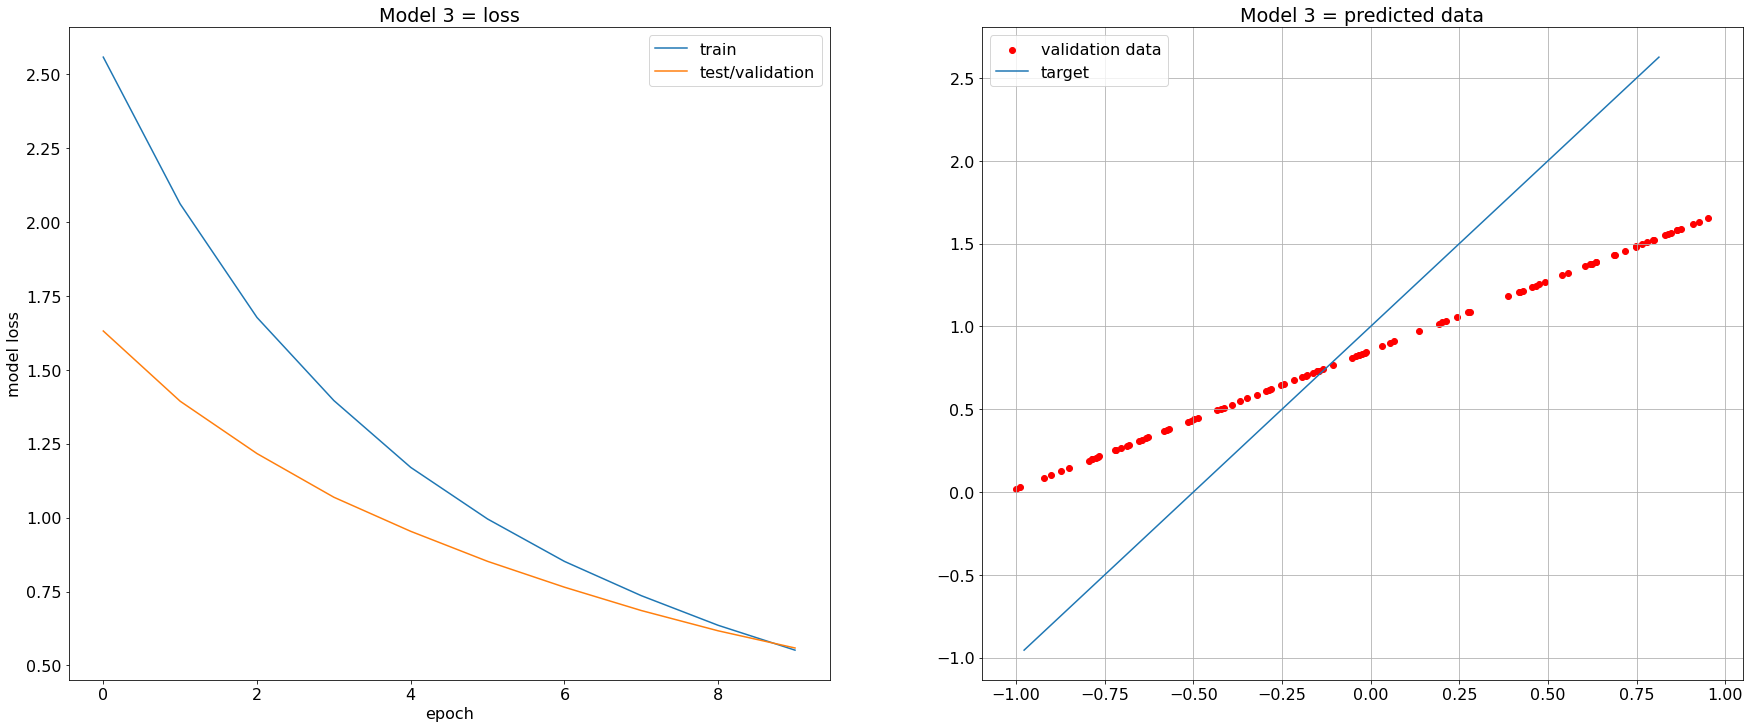

In [14]:
fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(30 , 12))

ax0.plot(history.history['loss'])
ax0.plot(history.history['val_loss'])
ax0.set_ylabel('model loss')
ax0.set_xlabel('epoch')
ax0.legend(['train', 'test/validation'], loc='best')
ax0.set_title('Model 3 = loss')

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
ax1.scatter(x_predicted, y_predicted,color='r', label="validation data")
ax1.plot(x_valid, y_target, label='target')
ax1.legend()
ax1.set_title('Model 3 = predicted data')
ax1.grid(True)
plt.show()

### Model 4 $\sigma=0.5$  $N_{epochs}=30$  $N_{train}=800$ 

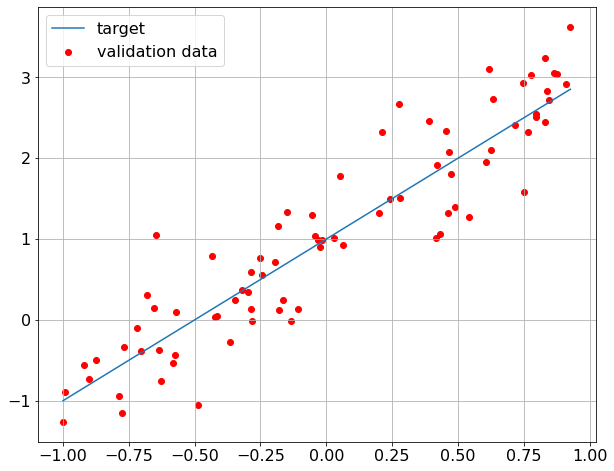

In [15]:
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 800)
x_valid = np.random.uniform(-1, 1, 80)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.5 # noise standard deviation
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

# plot validation and target dataset
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
# compose the model and complie it
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# fit the model using training dataset
# over 50 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))
model.get_weights()

Epoch 1/50
25/25 [==============================] - 0s 5ms/step - loss: 1.3447 - mse: 1.3447 - val_loss: 1.0198 - val_mse: 1.0198
Epoch 2/50
25/25 [==============================] - 0s 2ms/step - loss: 0.8080 - mse: 0.8080 - val_loss: 0.6582 - val_mse: 0.6582
Epoch 3/50
25/25 [==============================] - 0s 2ms/step - loss: 0.5631 - mse: 0.5631 - val_loss: 0.4810 - val_mse: 0.4810
Epoch 4/50
25/25 [==============================] - 0s 2ms/step - loss: 0.4386 - mse: 0.4386 - val_loss: 0.3875 - val_mse: 0.3875
Epoch 5/50
25/25 [==============================] - 0s 2ms/step - loss: 0.3686 - mse: 0.3686 - val_loss: 0.3323 - val_mse: 0.3323
Epoch 6/50
25/25 [==============================] - 0s 2ms/step - loss: 0.3256 - mse: 0.3256 - val_loss: 0.2977 - val_mse: 0.2977
Epoch 7/50
25/25 [==============================] - 0s 2ms/step - loss: 0.2975 - mse: 0.2975 - val_loss: 0.2748 - val_mse: 0.2748
Epoch 8/50
25/25 [==============================] - 0s 2ms/step - loss: 0.2783 - mse: 0.27

[array([[2.0464284]], dtype=float32), array([1.0109235], dtype=float32)]

In [17]:
# evaluate model 
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

3/3 [==============================] - 0s 2ms/step - loss: 0.2237 - mse: 0.2237

Test loss: 0.22365780174732208
Test accuracy: 0.22365780174732208


4/4 [==============================] - 0s 1ms/step


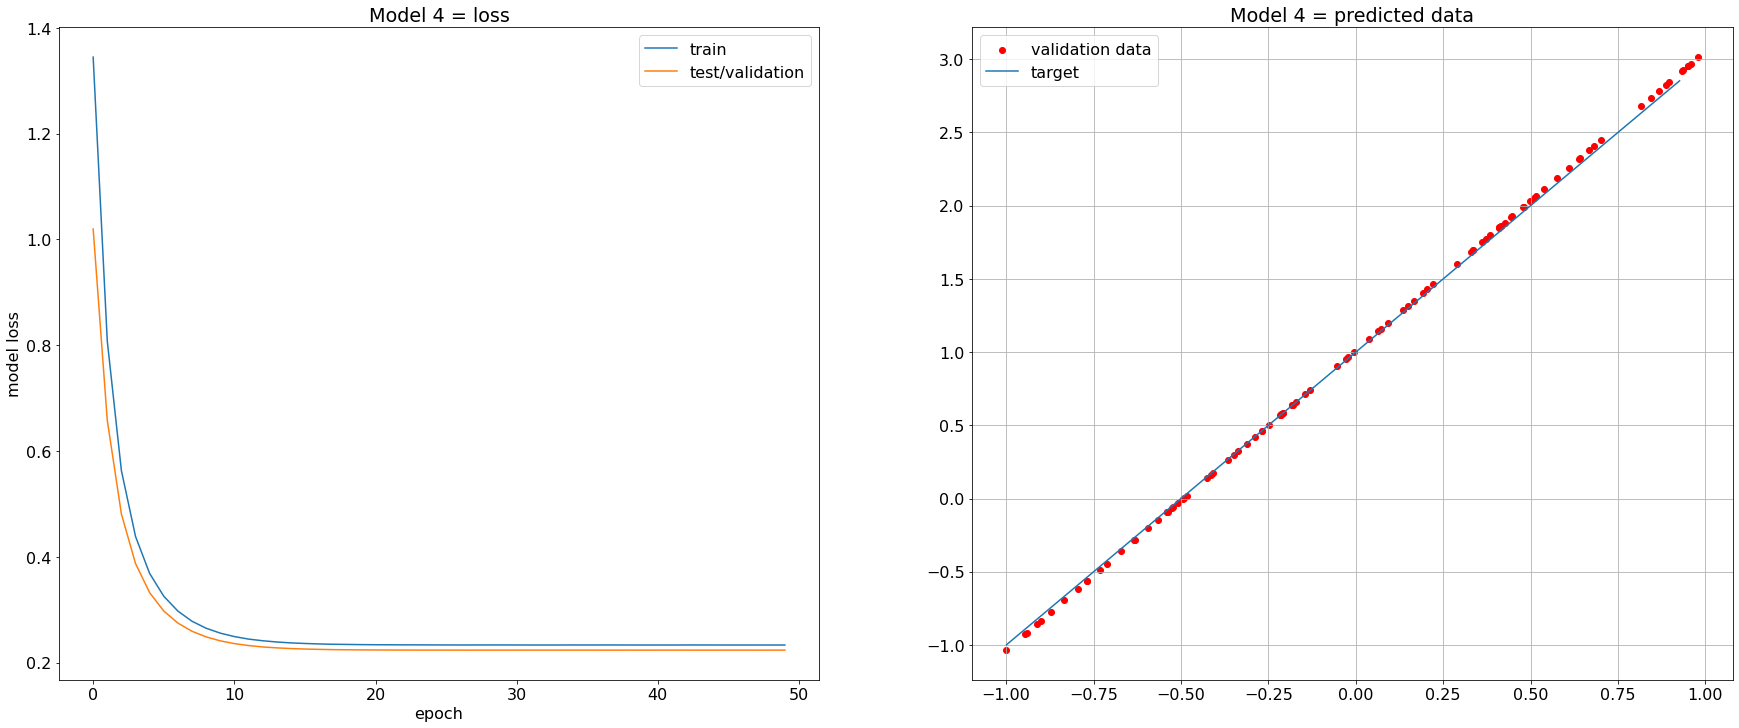

In [18]:
fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(30 , 12))

ax0.plot(history.history['loss'])
ax0.plot(history.history['val_loss'])
ax0.set_ylabel('model loss')
ax0.set_xlabel('epoch')
ax0.legend(['train', 'test/validation'], loc='best')
ax0.set_title('Model 4 = loss')

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
ax1.scatter(x_predicted, y_predicted,color='r', label="validation data")
ax1.plot(x_valid, y_target, label='target')
ax1.legend()
ax1.set_title('Model 4 = predicted data')
ax1.grid(True)
plt.show()

Tra i modelli utilizzati per la rete nuerale composta da un solo layer di un neurone il numero 4 risulta il migliore. Confrontando tutti i modelli usati si evince che il numero di dati a disposizione del modello per allenamento e il numero di epoche su cui allenare il modello stesso sono proporzionali alla bontà del modello. Il modello 4 presenta un numero sufficientmente alto sia di epoche sia di dati da allenamento, un eccessivo numero di dati su cui allenare il modelo determina un overfitting dei dati visibile nel grafico della loss (Modello 2). Complessivamente il Modello 3 composto da un basso numero di epoche e dati d'allenamento non riesce a fittare adeguatamente i dati. E' evidente che per ottenere un buon modello che risolva questo determinato problema è necessario allenare la rete su un numero sufficientemente grande di dati per un numero sufficientemente grande di dati, quindi entrambi i parametri sono importanti per detemrniare la bontà della rete proposta. Il Modello 1 presenta risultati intermedi rispetto ai modelli già analizzati. Per tutti in ogni caso è stato scelto un'ottimizzatore SGD (Stochastic Gradient Descent) che meglio descrive il problema in esame.

## Exercise 11.2

In [19]:
def poli(x):
    return (4-3*x-2*(x**2)+3*(x**3))

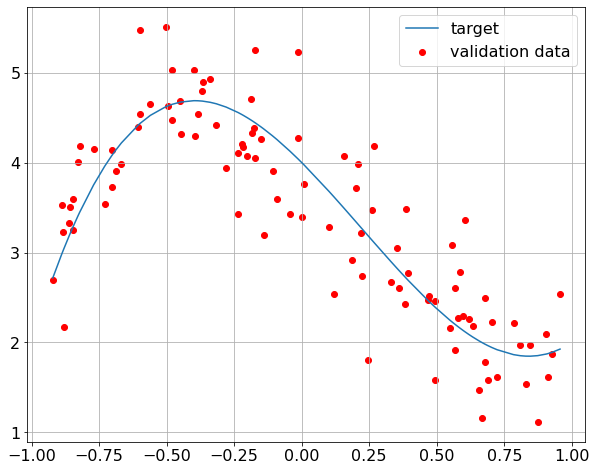

In [20]:
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 3000)
x_valid = np.random.uniform(-1, 1, 100)
x_valid.sort()
y_target = poli(x_valid) # ideal (target) function

sigma = 0.5 # noise standard deviation
y_train = np.random.normal(poli(x_train), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(poli(x_valid), sigma)

# plot validation and target dataset
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

# Model 1 - RELU Adam
model_1 = tf.keras.Sequential()
model_1.add(Dense(30, input_shape=(1,), activation='relu'))
model_1.add(Dense(10, activation='relu'))
model_1.add(Dense(1, activation='relu'))
model_1.compile(optimizer='adam', loss='mse', metrics=['mse'])

# Model 2 - SELU Adam
model_2 = tf.keras.Sequential()
model_2.add(Dense(30, input_shape=(1,), activation='selu'))
model_2.add(Dense(10, activation='selu'))
model_2.add(Dense(1, activation='selu'))
model_2.compile(optimizer='adam', loss='mse', metrics=['mse'])

# Model 3 - ELU Nadam
model_3 = tf.keras.Sequential()
model_3.add(Dense(30, input_shape=(1,), activation='elu'))
model_3.add(Dense(10, activation='elu'))
model_3.add(Dense(1, activation='elu'))
model_3.compile(optimizer='nadam', loss='mse', metrics=['mse'])

# Model 4 - COMINATION MSE
model_4 = tf.keras.Sequential()
model_4.add(Dense(30, input_shape=(1,), activation='elu'))
model_4.add(Dense(10, activation='selu'))
model_4.add(Dense(1, activation='relu'))
model_4.compile(optimizer='adam', loss='mse', metrics=['mse'])

# Model 5 - COMINATION MAE
model_5 = tf.keras.Sequential()
model_5.add(Dense(30, input_shape=(1,), activation='elu'))
model_5.add(Dense(10, activation='selu'))
model_5.add(Dense(1, activation='relu'))
model_5.compile(optimizer='adam', loss='mae', metrics=['mse'])

# Model 6 -SIGMOID
model_6 = tf.keras.Sequential()
model_6.add(Dense(30, input_shape=(1,), activation='sigmoid'))
model_6.add(Dense(10, activation='sigmoid'))
model_6.add(Dense(1))
model_6.compile(optimizer='adam', loss='mse', metrics=['mse'])

# Model 7 - TANH
model_7 = tf.keras.Sequential()
model_7.add(Dense(30, input_shape=(1,), activation='tanh'))
model_7.add(Dense(10, activation='tanh'))
model_7.add(Dense(1))
model_7.compile(optimizer='adam', loss='mse', metrics=['mse'])

# Model 8 - COMBINATION pleteau and open bunds
model_8 = tf.keras.Sequential()
model_8.add(Dense(500, input_shape=(1,), activation='tanh'))
model_8.add(Dense(30, activation='sigmoid'))
model_8.add(Dense(10, activation='relu'))
model_8.add(Dense(1, activation='selu'))
model_8.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [22]:
# fit the Model 1 using training dataset
history_1 = model_1.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid),
          verbose=0)

In [23]:
# fit the Model 2 using training dataset
history_2 = model_2.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid),
          verbose=0)

In [24]:
# fit the Model 3 using training dataset
history_3 = model_3.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid),
          verbose=0)

In [25]:
# fit the Model 4 using training dataset
history_4 = model_4.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid),
          verbose=0)

In [26]:
# fit the Model 5 using training dataset
history_5 = model_5.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid),
          verbose=0)

In [27]:
# fit the Model 6 using training dataset
history_6 = model_6.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid),
          verbose=0)

In [28]:
# fit the Model 7 using training dataset
history_7 = model_7.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid),
          verbose=0)

In [29]:
# fit the Model 8 using training dataset
history_8 = model_8.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid),
          verbose=0)

In [30]:
# evaluate Model 1 
score_1 = model_1.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
score_2 = model_2.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
score_3 = model_3.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
score_4 = model_4.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
score_5 = model_5.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
score_6 = model_6.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
score_7 = model_7.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
score_8 = model_8.evaluate(x_valid, y_valid, batch_size=32, verbose=0)

print('Model 1:')
print('\tTest loss:', score_1[0])
print('\tTest accuracy:', score_1[1])

print('Model 2:')
print('\tTest loss:', score_2[0])
print('\tTest accuracy:', score_2[1])

print('Model 3:')
print('\tTest loss:', score_3[0])
print('\tTest accuracy:', score_3[1])

print('Model 4:')
print('\tTest loss:', score_4[0])
print('\tTest accuracy:', score_4[1])

print('Model 5:')
print('\tTest loss:', score_5[0])
print('\tTest accuracy:', score_5[1])

print('Model 6:')
print('\tTest loss:', score_6[0])
print('\tTest accuracy:', score_6[1])

print('Model 7:')
print('\tTest loss:', score_7[0])
print('\tTest accuracy:', score_7[1])

print('Model 8:')
print('\tTest loss:', score_8[0])
print('\tTest accuracy:', score_8[1])

Model 1:
	Test loss: 0.27994176745414734
	Test accuracy: 0.27994176745414734
Model 2:
	Test loss: 0.2807445228099823
	Test accuracy: 0.2807445228099823
Model 3:
	Test loss: 0.26438069343566895
	Test accuracy: 0.26438069343566895
Model 4:
	Test loss: 0.2773289382457733
	Test accuracy: 0.2773289382457733
Model 5:
	Test loss: 0.40826910734176636
	Test accuracy: 0.27362722158432007
Model 6:
	Test loss: 0.3922331631183624
	Test accuracy: 0.3922331631183624
Model 7:
	Test loss: 0.26973116397857666
	Test accuracy: 0.26973116397857666
Model 8:
	Test loss: 0.2773986756801605
	Test accuracy: 0.2773986756801605


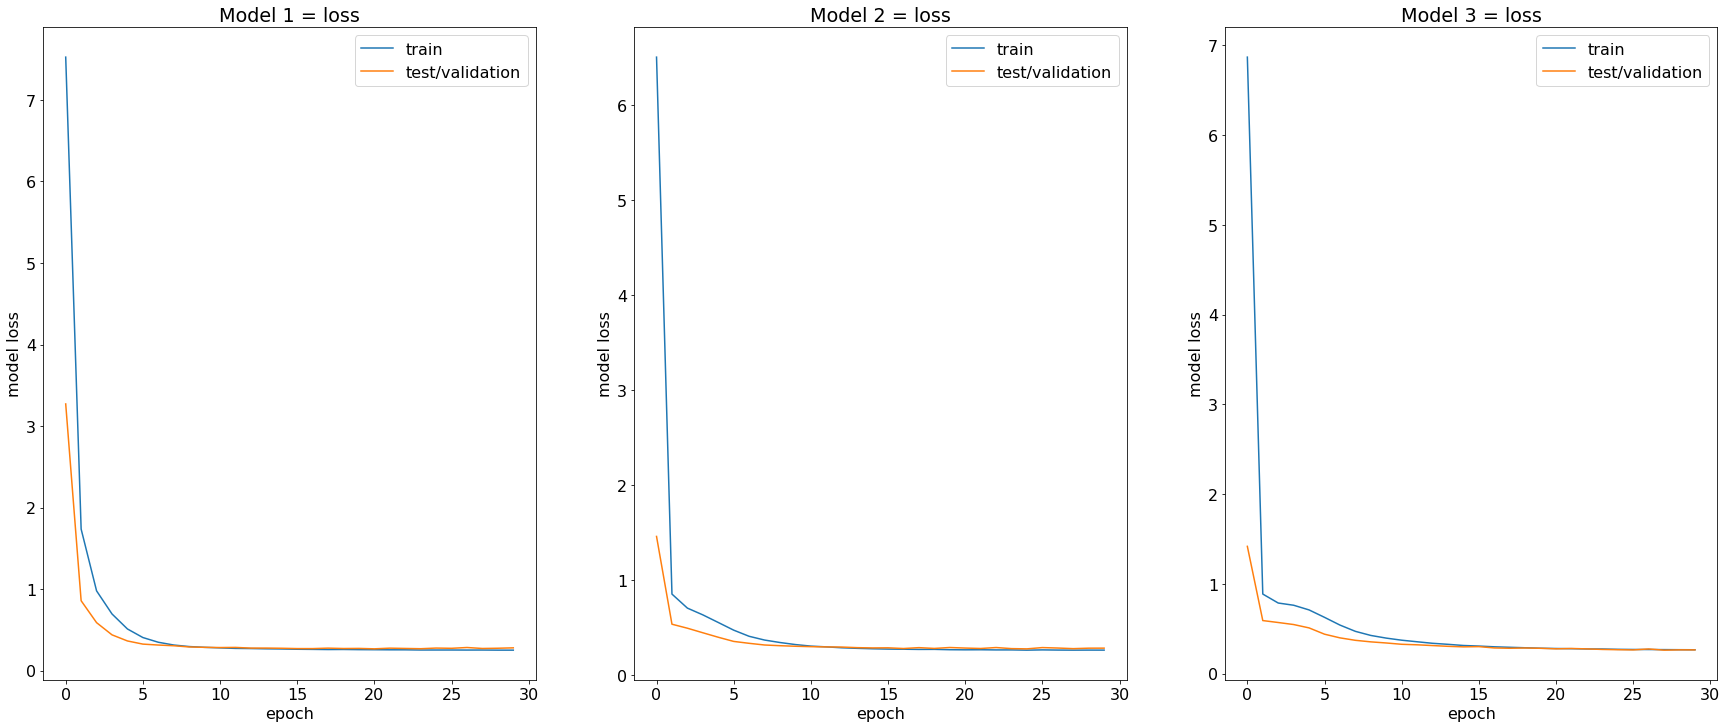

In [31]:
# RELU Actitivation
fig, [ax0, ax1, ax2] = plt.subplots(1, 3, figsize=(30 , 12))

ax0.plot(history_1.history['loss'])
ax0.plot(history_1.history['val_loss'])
ax0.set_ylabel('model loss')
ax0.set_xlabel('epoch')
ax0.legend(['train', 'test/validation'], loc='best')
ax0.set_title('Model 1 = loss')

ax1.plot(history_2.history['loss'])
ax1.plot(history_2.history['val_loss'])
ax1.set_ylabel('model loss')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'test/validation'], loc='best')
ax1.set_title('Model 2 = loss')

ax2.plot(history_3.history['loss'])
ax2.plot(history_3.history['val_loss'])
ax2.set_ylabel('model loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'test/validation'], loc='best')
ax2.set_title('Model 3 = loss')

plt.show()

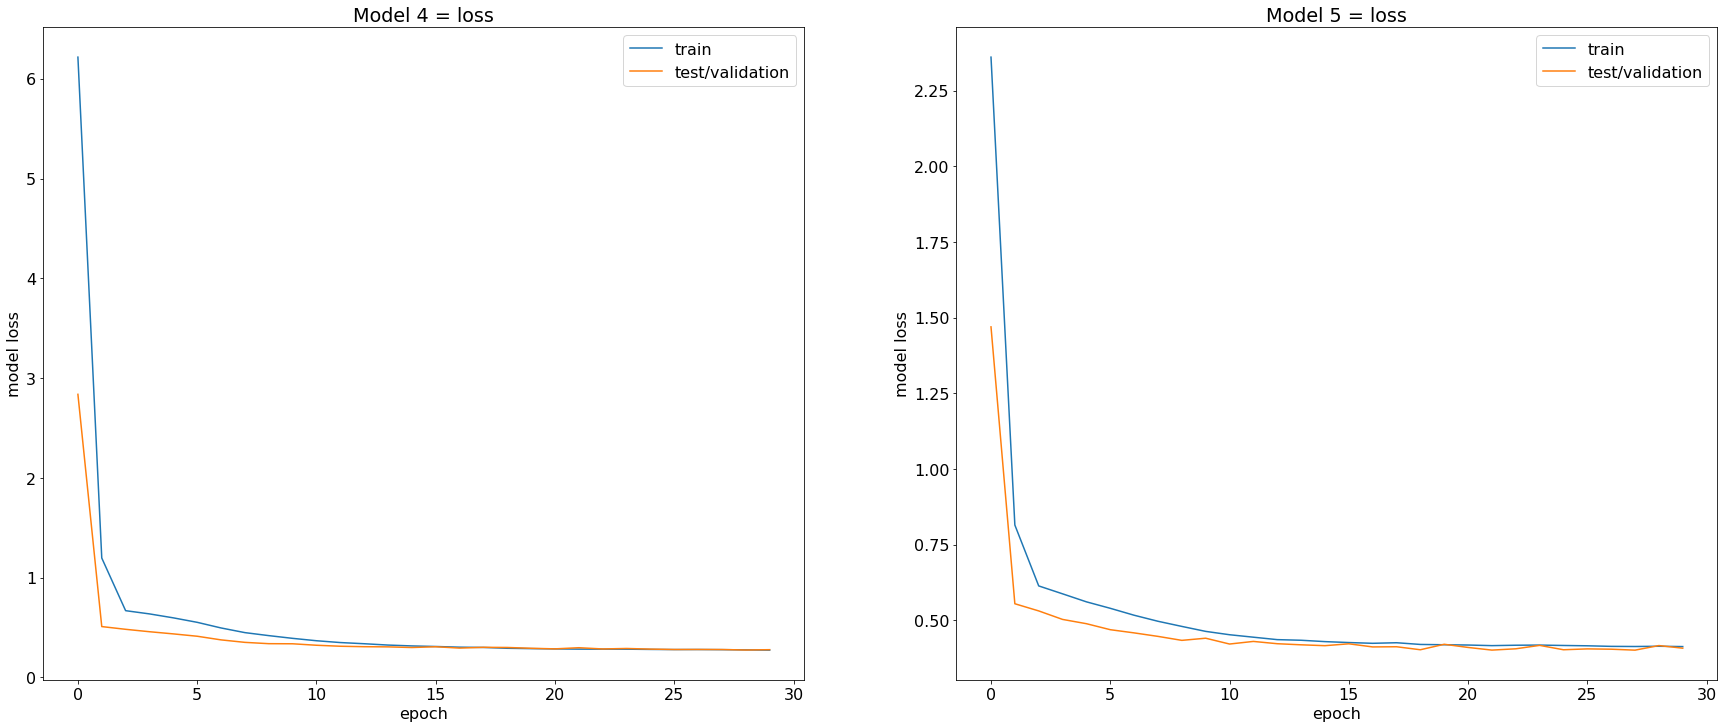

In [32]:
# Combination RELU, SELU, ELU
fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(30 , 12))

ax0.plot(history_4.history['loss'])
ax0.plot(history_4.history['val_loss'])
ax0.set_ylabel('model loss')
ax0.set_xlabel('epoch')
ax0.legend(['train', 'test/validation'], loc='best')
ax0.set_title('Model 4 = loss')

ax1.plot(history_5.history['loss'])
ax1.plot(history_5.history['val_loss'])
ax1.set_ylabel('model loss')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'test/validation'], loc='best')
ax1.set_title('Model 5 = loss')

plt.show()

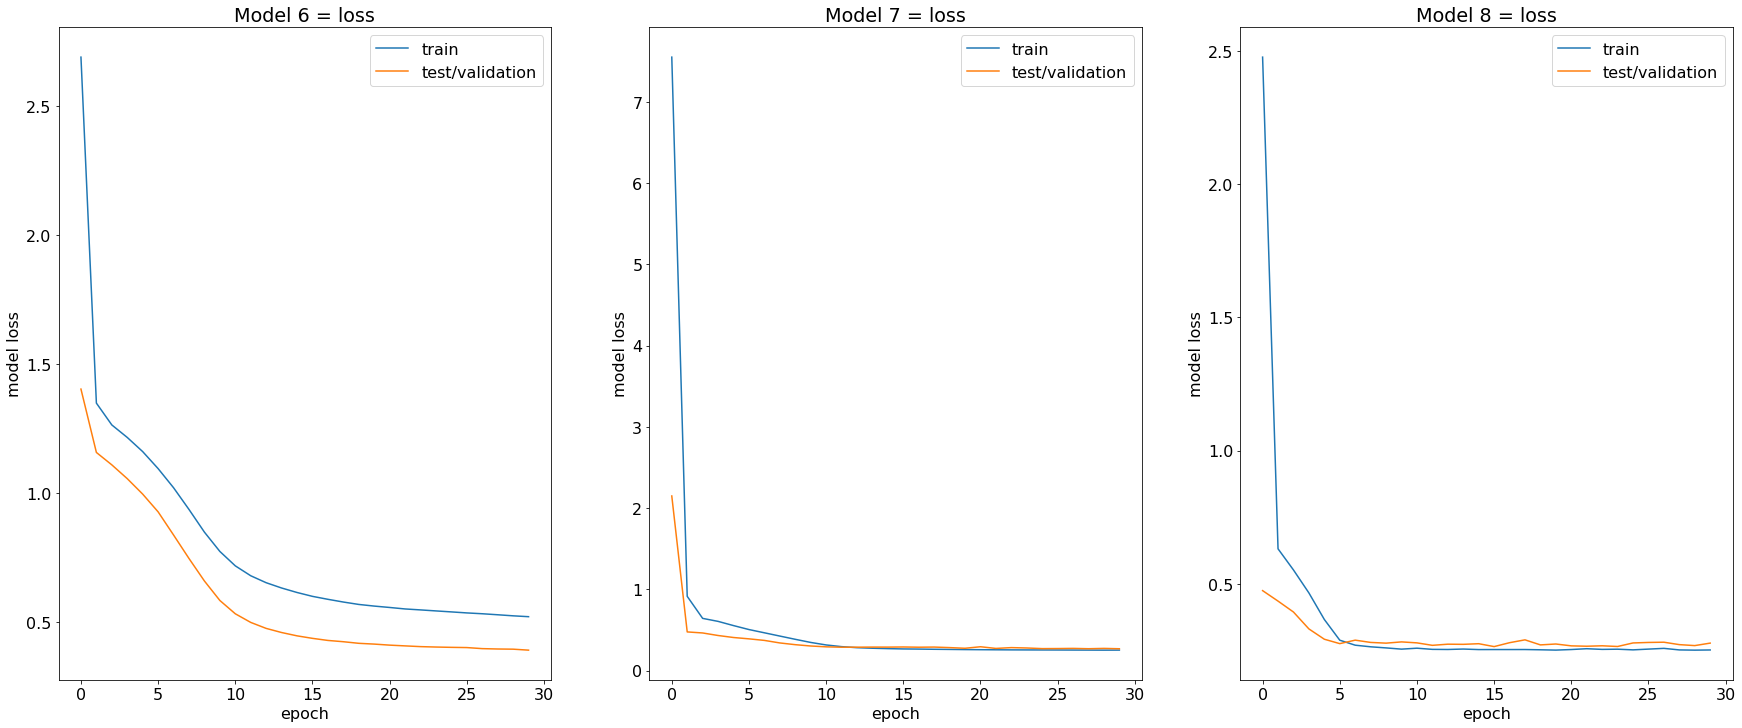

In [33]:
# Activation function with plateau
fig, [ax0, ax1, ax2] = plt.subplots(1, 3, figsize=(30 , 12))

ax0.plot(history_6.history['loss'])
ax0.plot(history_6.history['val_loss'])
ax0.set_ylabel('model loss')
ax0.set_xlabel('epoch')
ax0.legend(['train', 'test/validation'], loc='best')
ax0.set_title('Model 6 = loss')

ax1.plot(history_7.history['loss'])
ax1.plot(history_7.history['val_loss'])
ax1.set_ylabel('model loss')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'test/validation'], loc='best')
ax1.set_title('Model 7 = loss')

ax2.plot(history_8.history['loss'])
ax2.plot(history_8.history['val_loss'])
ax2.set_ylabel('model loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'test/validation'], loc='best')
ax2.set_title('Model 8 = loss')

plt.show()

#### New Predictions with models

32/32 [==============================] - 0s 927us/step


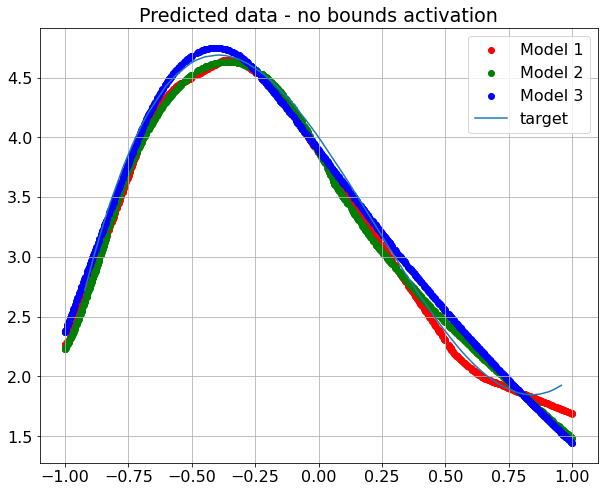

In [34]:
# Activation with no bounds
x_predicted = np.random.uniform(-1, 1, 1000)
y_predicted_1 = model_1.predict(x_predicted)
y_predicted_2 = model_2.predict(x_predicted)
y_predicted_3 = model_3.predict(x_predicted)
plt.scatter(x_predicted, y_predicted_1,color='r', label="Model 1")
plt.scatter(x_predicted, y_predicted_2,color='g', label="Model 2")
plt.scatter(x_predicted, y_predicted_3,color='b', label="Model 3")
plt.plot(x_valid, y_target, label='target')
plt.legend()
plt.title('Predicted data - no bounds activation')
plt.grid(True)
plt.show()

I tre modelli si differenziano per le funzioni di attivazione utilizzate e per gli ottimizzatori impostatti. Tutti quanti presentano lo stesso numero di layers (3) e gli stessi numeri di neuroni per ciascun layer ed inoltre le funzioni di attivazione non hanno vincoli sul range di valori di output. Il Modello 1 ed il Modello 2 sono basati su funzioni di attivazione 'relu' e 'selu rispettivamente con un ottimizzatore di tipo 'Adam', essi presentano un comportamento simile fra loro. Il Modello 3 è basato su una funzione di attivazione 'elu' e un ottimizzatore di tipo 'Nadam'. Tutti è tre possiedono inoltre una funzione costo di tipo 'mse'. L'unica differenza tra i vari modelli presente è quella della descizione della coda destra tra il Modello 3 e gli altri due; il terzo modello descrive una discesa lineare e ripida, gli alti invece presentano una discesa smussata, più simile a quella della funzione ideale.

32/32 [==============================] - 0s 941us/step


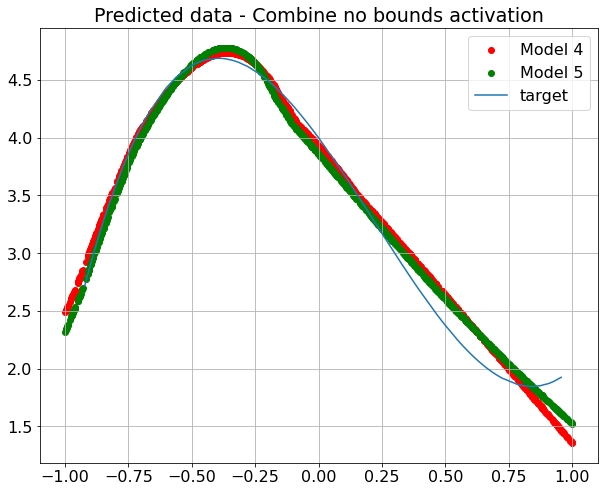

In [35]:
# Combination RELU, ELU, SELU Actitivation
x_predicted = np.random.uniform(-1, 1, 1000)
y_predicted_4 = model_4.predict(x_predicted)
y_predicted_5 = model_5.predict(x_predicted)
plt.scatter(x_predicted, y_predicted_4,color='r', label="Model 4")
plt.scatter(x_predicted, y_predicted_5,color='g', label="Model 5")
plt.plot(x_valid, y_target, label='target')
plt.legend()
plt.title('Predicted data - Combine no bounds activation')
plt.grid(True)
plt.show()

I due modelli rappresenatno una combinazione dei tre modelli presentati precedentemente. Sono costituiti da tre layer così organizzati: il primo layer di 30 neuroni e con una funzione di attivazione 'elu', il secondo di 10 neuroni e con una funzione 'selu' e il terzo da un singolo neurone con attivazione 'relu'. L'ottimizzatore di tipo 'Adam' è identico per i due modelli. L'unica differenza tra i due è costituita dalla funzione di costo: il Modello 4 possiede un costo 'mse' e il Modello 5 un costo 'mae'. Quello che si evince però è che le differenze in costo non cambiano sotanzialmente la bontà del fit poichè i due modelli presentano comportamenti analoghi.

32/32 [==============================] - 0s 998us/step


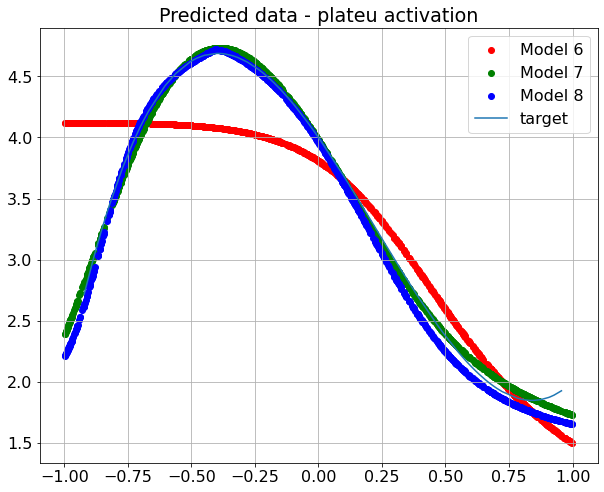

In [36]:
# Activation function with plateau
x_predicted = np.random.uniform(-1, 1, 1000)
y_predicted_6 = model_6.predict(x_predicted)
y_predicted_7 = model_7.predict(x_predicted)
y_predicted_8 = model_8.predict(x_predicted)
plt.scatter(x_predicted, y_predicted_6,color='r', label="Model 6")
plt.scatter(x_predicted, y_predicted_7,color='g', label="Model 7")
plt.scatter(x_predicted, y_predicted_8,color='b', label="Model 8")
plt.plot(x_valid, y_target, label='target')
plt.legend()
plt.title('Predicted data - plateu activation')
plt.grid(True)
plt.show()

I Modellli 6 e 7 sono reallizati attraverso l'uso di layers con funzioni di attivazione caratterizzate da un valor massimo di soglia. Entrambi modelli presentano lo stesso numero di layers (3), di neuroni per layes di ottimizzatore e di costo; il Modello 6 ha un'attivazione 'sigmoid' e il Modello 7 un'attivazione 'tanh'. Il primo dei due risulta completamente inefficiente nel descrivere accuratmente il problema. Il secondo invece riesce fittare molto bene i dati superando, apparentemente, i modelli precedentmente analizzati. La forza della funzione di attivazione 'tanh' viene espressa anche nel Modello 8 costituito da: un primo layer di 500 nueroni con attivazione 'tanh', un secondo layer di 30 neuroni con attivazione 'sigmoid', un terzo layer di 10 neuroni con attivazione 'relu' ed un ultimo layer con attivazione 'selu'. Esso inoltre presenta un ottimizzatore 'Adam' con un costo 'mse'. Questa combinzazione di diverse tipoligie di funzioni di attivazione nei layer, oltre una più profonda ed ampia rete ha permesso di ottenere i risultati più accurati nella fitting dei dati di test.

## Exercise 11.3

In [37]:
def sin2D(x,y):
    return np.sin(x**2 + y**2)

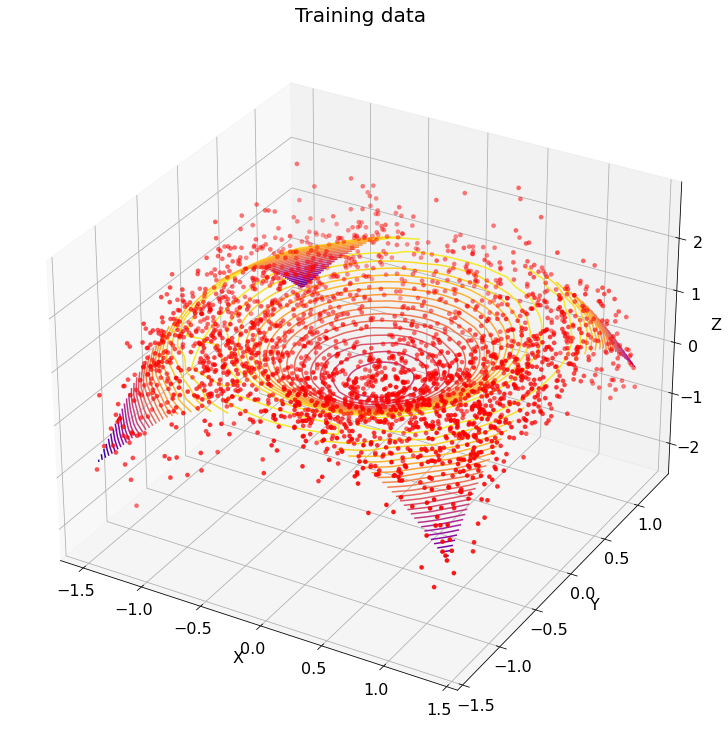

In [56]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# generate training inputs
np.random.seed(0)
data_train = np.random.uniform(-1.5, 1.5, size=(10000, 2))
data_valid = np.random.uniform(-1.5, 1.5, size=(1000, 2))
data_valid.sort()
f_target = sin2D(data_valid[0], data_valid[1]) # ideal (target) function

sigma = 0.5 # noise standard deviation
f_train = np.random.normal(sin2D(data_train[:,0], data_train[:,1]), sigma) # actual measures from which we want to guess regression parameters
f_valid = np.random.normal(sin2D(data_valid[:,0], data_valid[:,1]), sigma)

# use a smaller set of data to print in a graph only for aesthetics
test_points = np.random.uniform(-1.5, 1.5, size=(2, 50))
test_points.sort()
X, Y = np.meshgrid(test_points[0], test_points[1])
Z_target= sin2D(X,Y)
Z_valid = np.random.normal(sin2D(X, Y), sigma)

fig = plt.figure(figsize=(18,13))
ax = plt.axes(projection='3d')
ax.scatter(X, Y, Z_valid, color='r', linewidth=0.1)
ax.contour3D(X, Y, Z_target, 30, cmap='plasma')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Training data', fontsize=20)
plt.grid(True)

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from keras.optimizers import Adam


# Model
model = tf.keras.Sequential()
model.add(Dense(30, input_shape=(2,), activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='relu'))
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [58]:
# fit the Model 1 using training dataset
history = model.fit(x=data_train, y=f_train, 
          batch_size=32, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(data_valid, f_valid),
          verbose=0)

In [59]:
score = model.evaluate(data_valid, f_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

32/32 [==============================] - 0s 1ms/step - loss: 0.2603 - mse: 0.2603

Test loss: 0.26033201813697815
Test accuracy: 0.26033201813697815


Text(0.5, 1.0, 'Model - loss')

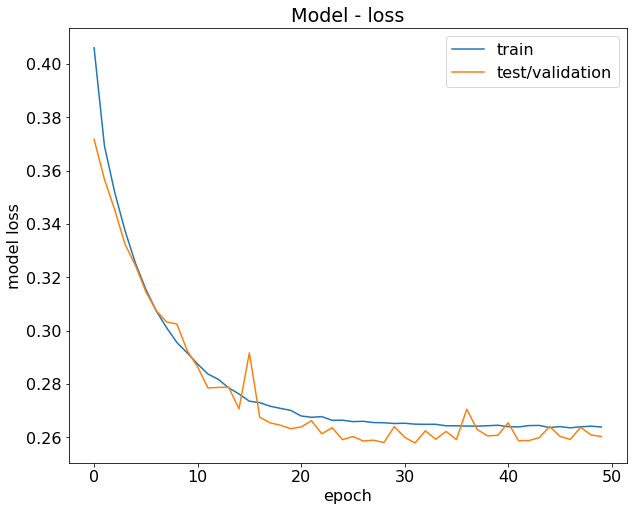

In [60]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test/validation'], loc='best')
plt.title('Model - loss')

32/32 [==============================] - 0s 1ms/step


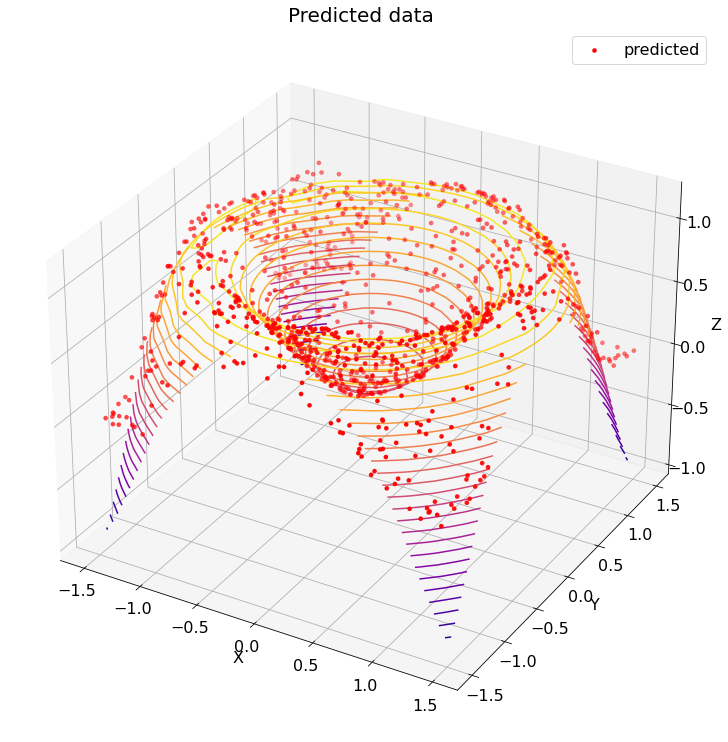

In [67]:
data_predicted = np.random.uniform(-1.5, 1.5,size=(1000,2))
f_predicted = model.predict(data_predicted)

test_points = np.random.uniform(-1.5, 1.5, size=(2, 50))
test_points.sort()
X, Y = np.meshgrid(test_points[0], test_points[1])
Z_target= sin2D(X,Y)

fig = plt.figure(figsize=(18,13))
ax = plt.axes(projection='3d')
ax.scatter(data_predicted[:,0], data_predicted[:,1], f_predicted, color='r', linewidth=0.1, label='predicted')
ax.contour3D(X, Y, Z_target, 30, cmap='plasma')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.legend()
ax.set_title('Predicted data', fontsize=20)
plt.grid(True)

Il modello di rete neurale proposto utilizza 4 layes con attivazione 'relu' composti rispettivamente da 30, 20, 10 e 1 nueroni. Ho impsotato uno Stochastic Gradient Descent come ottimizzatore e una funzione costo di tipo 'mse' (Mean Squared Error). La funzione bidiminsionale propsta è stata sporcata con un rumore di 0.5. Il numero di dati di training e di test è propoporzionale alla complessità del problmea, in questo caso i valori equivalgono a 10000 dati di pratica e 1000 dati test. Anche il numero di epoche è proporzionale alla complessita del problema e per questo rispetto ai problemi precedenti è stato alazato a 50. Nonostante questo si vede oltre le 30 epoche i valore di costo si stagna intorno a 0.27, conseguentemente, per questo problema, avrei potuto impostare 30 epoche in cui esercitare la rete neurale. I valori predetti si avvicinano molto ai valori della funzione ideale, senza rumore, cosicchè si 